# SANTANDER  CUSTOMER  TRANSACTION  PREDICTION

![](atm_image.png)

## BUSINESS PROBLEM 

Kaggle Competition: Santander Customer Transaction Prediction

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

## DATA ACQUISITION :

All the data set for the problem is available in the below link:

https://www.kaggle.com/c/santander-customer-transaction-prediction/data

## FILE DESCRIPTION :


You are provided with an anonymized dataset containing numeric feature variables, the binary target column, and a string ID_code column.

The task is to predict the value of target column in the test set.

File descriptions : 
train.csv - the training set. test.csv - the test set. The test set contains some rows which are not   included in scoring. sample_submission.csv - a sample submission file in the correct format.

## EVALUATION METRIC:


Submissions for the competition is evaluated on area under the ROC curve between the predicted probability and the observed target. However,f1 score and log loss have also been calculated.

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV    
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from prettytable import PrettyTable
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import pickle

## EXPLORATORY  DATA  ANALYSIS

In [2]:
train_data=pd.read_csv("train.csv")
train_data.head(10)

ID_code  target    var_0   var_1    var_2   var_3    var_4    var_5  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486   
5  train_5       0  11.4763 -2.3182  12.6080  8.6264  10.9621   3.5609   
6  train_6       0  11.8091 -0.0832   9.3494  4.2916  11.1355  -8.0198   
7  train_7       0  13.5580 -7.9881  13.8776  7.5985   8.6543   0.8310   
8  train_8       0  16.1071  2.4426  13.9307  5.6327   8.8014   6.1630   
9  train_9       0  12.5088  1.9743   8.8960  5.4508  13.6043 -16.2859   

    var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.1187  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  5.6208  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  6.9427  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  5.8428  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  5.9405  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   
5  4.5322  15.2255  ...  -6.3068   6.6025   5.2912   0.4403  14.9452   1.0314   
6  6.1961  12.0771  ...   8.7830   6.4521   3.5325   0.1777  18.3314   0.5845   
7  5.6890  22.3262  ...  13.1700   6.5491   3.9906   5.8061  23.1407  -0.3776   
8  4.4514  10.1854  ...   1.4298  14.7510   1.6395   1.4181  14.8370  -1.9940   
9  6.0637  16.8410  ...   0.5543   6.3160   1.0371   3.6885  14.8344   0.4467   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  
5  -3.6241   9.7670  12.5809  -4.7602  
6   9.1104   9.1143  10.8869  -3.2097  
7   4.2178   9.4237   8.6624   3.4806  
8  -1.0733   8.1975  19.5114   4.8453  
9  14.1287   7.9133  16.2375  14.2514  

[10 rows x 202 columns]

In [3]:
print("Shape of train data is :", train_data.shape)

Shape of train data is : (200000, 202)


In [4]:
test_data=pd.read_csv("test.csv")
test_data.head(10)

ID_code    var_0    var_1    var_2   var_3    var_4    var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327  -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974  -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628   9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458   3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035  -8.5848  6.8595   
5  test_5   5.9862  -2.2913   8.6058  7.0685  14.2465  -8.6761  4.2467   
6  test_6   8.4624  -6.1065   7.3603  8.2627  12.0104  -7.2073  4.1670   
7  test_7  17.3035  -2.4212  13.3989  8.3998  11.0777   9.6449  5.9596   
8  test_8   6.9856   0.8402  13.7161  4.7749   8.6784 -13.7607  4.3386   
9  test_9  10.3811  -6.9348  14.6690  9.0941  11.9058 -10.8018  3.4508   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   
5  14.7632  1.8790  ...  -2.1115   7.1178  -0.4249   8.8781  14.9438  -2.2151   
6  13.0809 -4.3004  ...  12.3609   6.8661   4.0971   8.8484  17.5010   0.0295   
7  17.8477 -4.8068  ...   4.4676   4.4214   0.9303   1.4994  15.2648  -1.7931   
8  14.5843  2.5883  ...  -3.4657   7.8754   2.4698  -0.0362  16.7144   0.1221   
9  20.2816 -1.4112  ...   1.8052  11.0723   0.8907   4.7680  15.1425   0.6075   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  
5  -6.0233   9.8117  17.1127  10.8240  
6   7.7443   9.1509  18.4736   5.1499  
7   6.5316  10.4855  23.4631   0.7283  
8  -1.4328   9.9207  16.9865  -3.3304  
9  -4.4447   9.5788  15.8146   9.3457  

[10 rows x 201 columns]

In [5]:
test_id = test_data['ID_code']

In [6]:
test_data = test_data.drop(['ID_code'],axis=1)

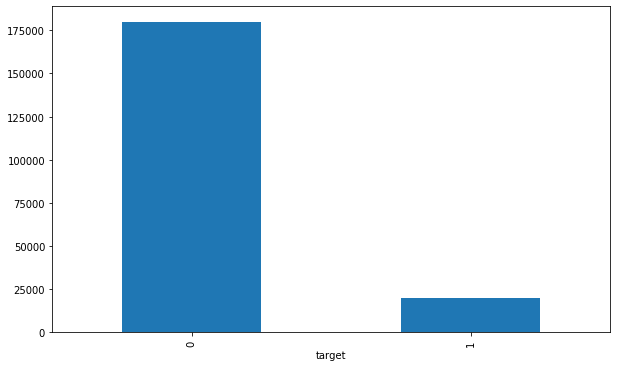

In [7]:
fig = plt.figure(figsize = (10,6))
train_data.groupby("target")['ID_code'].count().plot.bar()

In [8]:
print("Total no. of 0's:",train_data["target"].value_counts()[0],'(',train_data["target"].value_counts()[0]/(train_data["target"].value_counts()[0]+train_data["target"].value_counts()[1])*100,'%)')
print("Total no. of 1's:",train_data["target"].value_counts()[1],'(',train_data["target"].value_counts()[1]/(train_data["target"].value_counts()[0]+train_data["target"].value_counts()[1])*100,'%)')

Total no. of 0's: 179902 ( 89.95100000000001 %)
Total no. of 1's: 20098 ( 10.049 %)


### Checking for any missing values:

In [9]:
train_data.isnull().sum().sum()

0

The train dataset does not contain any missing values !!

In [10]:
train_data.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [7]:
columns = list(train_data.columns)
columns.remove("ID_code")
columns.remove("target")

#### Histogram analysis of all the features:

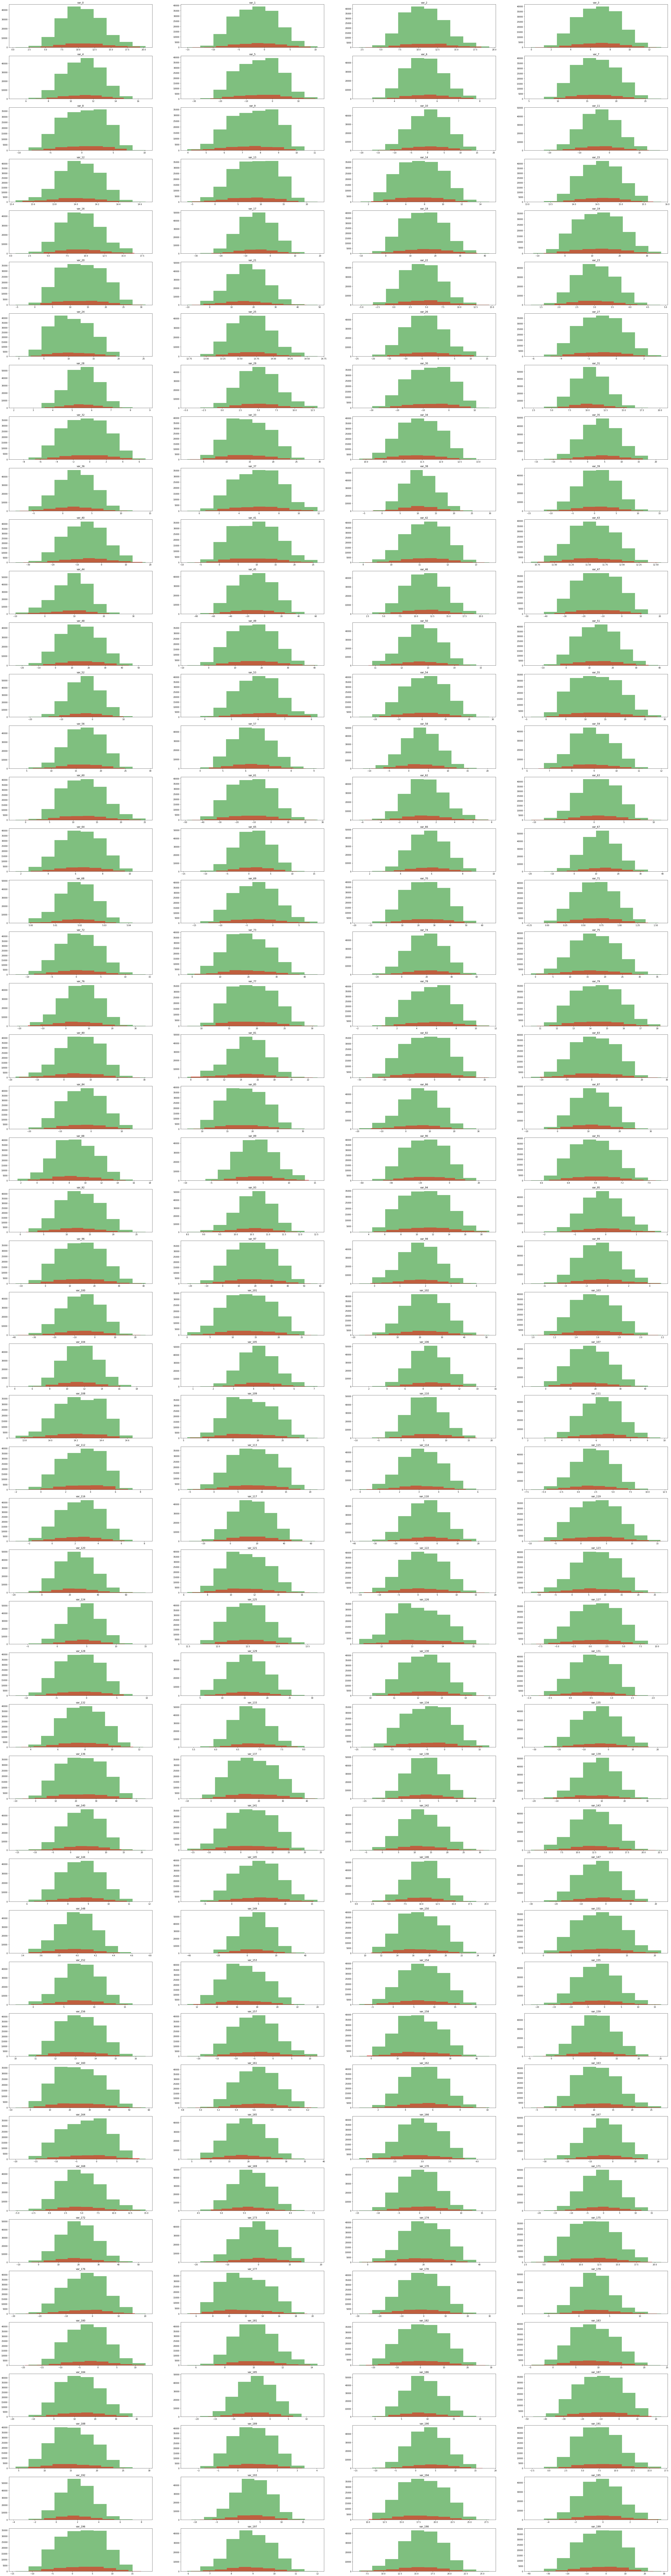

In [9]:
plt.figure(figsize=(60, 240))
for i, col in enumerate(columns):
    plt.subplot(50, 4, i + 1)
    plt.hist(train_data[train_data["target"] == 0][col], alpha=0.5, label='0', color='g')
    plt.hist(train_data[train_data["target"] == 1][col], alpha=0.5, label='1', color='r')    
    plt.title(col)

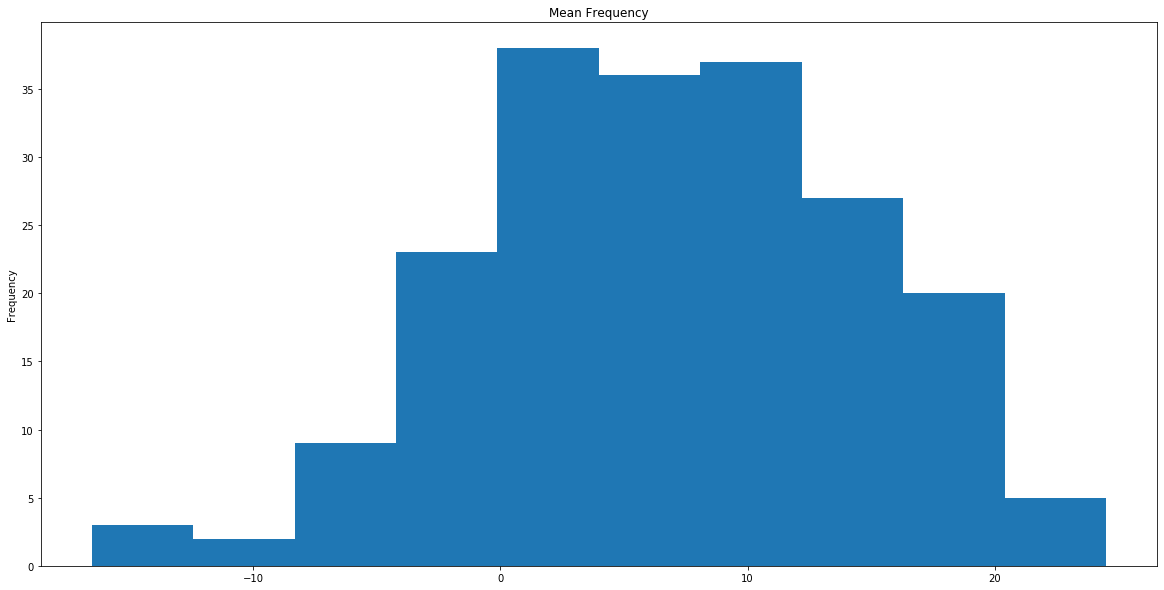

In [10]:
plt.figure(figsize=(20, 10))
train_data[columns].mean().plot(kind='hist');
plt.title('Mean Frequency');

Between mean of 0 to 12 maximum number of column lies

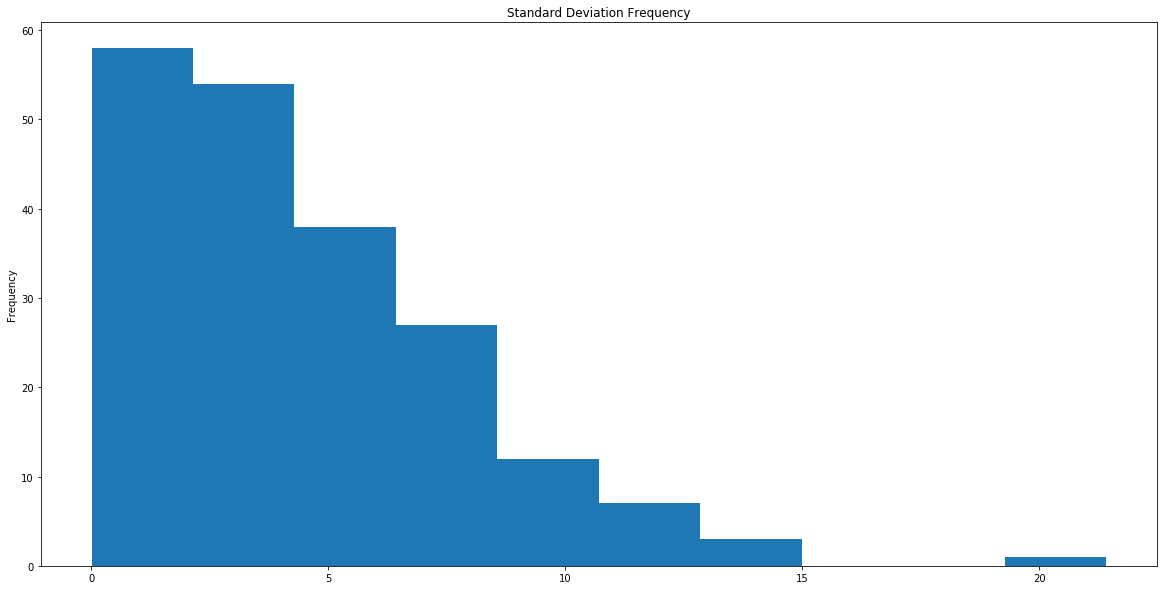

In [11]:
plt.figure(figsize=(20, 10))
train_data[columns].std().plot(kind='hist');
plt.title('Standard Deviation Frequency');

1. Between standard deviation of 0 to 4 maximum number of column lies.
2. Small amount of columns have standard deviation above 8

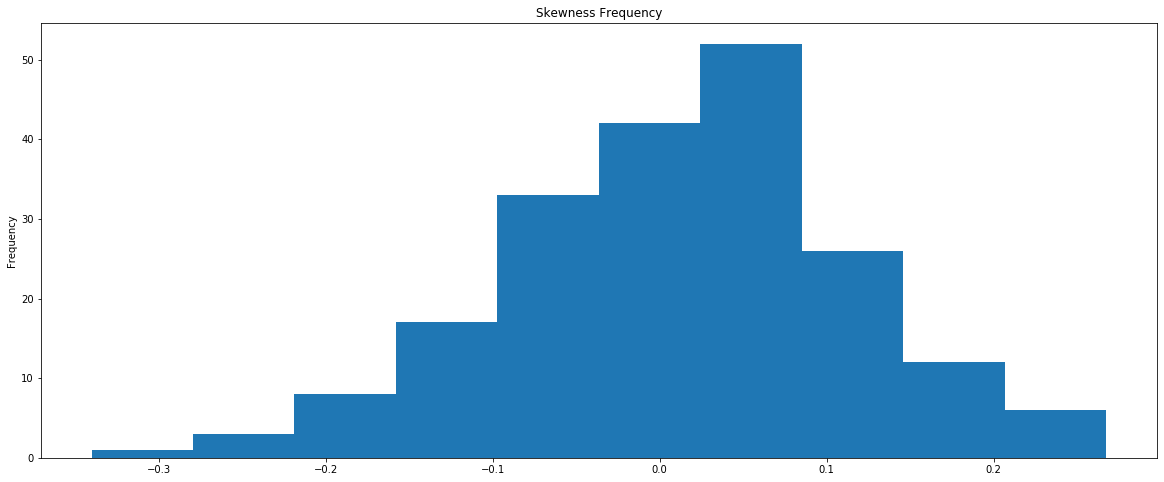

In [12]:
plt.figure(figsize=(20, 8))
train_data[columns].skew().plot(kind='hist');
plt.title('Skewness Frequency');

Majority of the column have skewness between -0.2 & 0.2

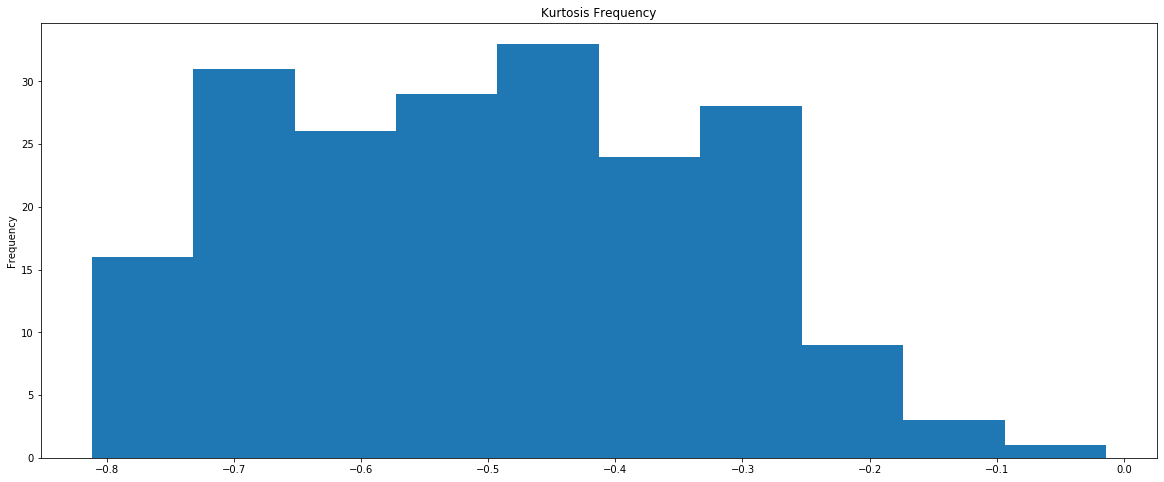

In [13]:
plt.figure(figsize=(20, 8))
train_data[columns].kurt().plot(kind='hist');
plt.title('Kurtosis Frequency');

Majority of the columns have kurtosis ranging between -0.8 & 0.25

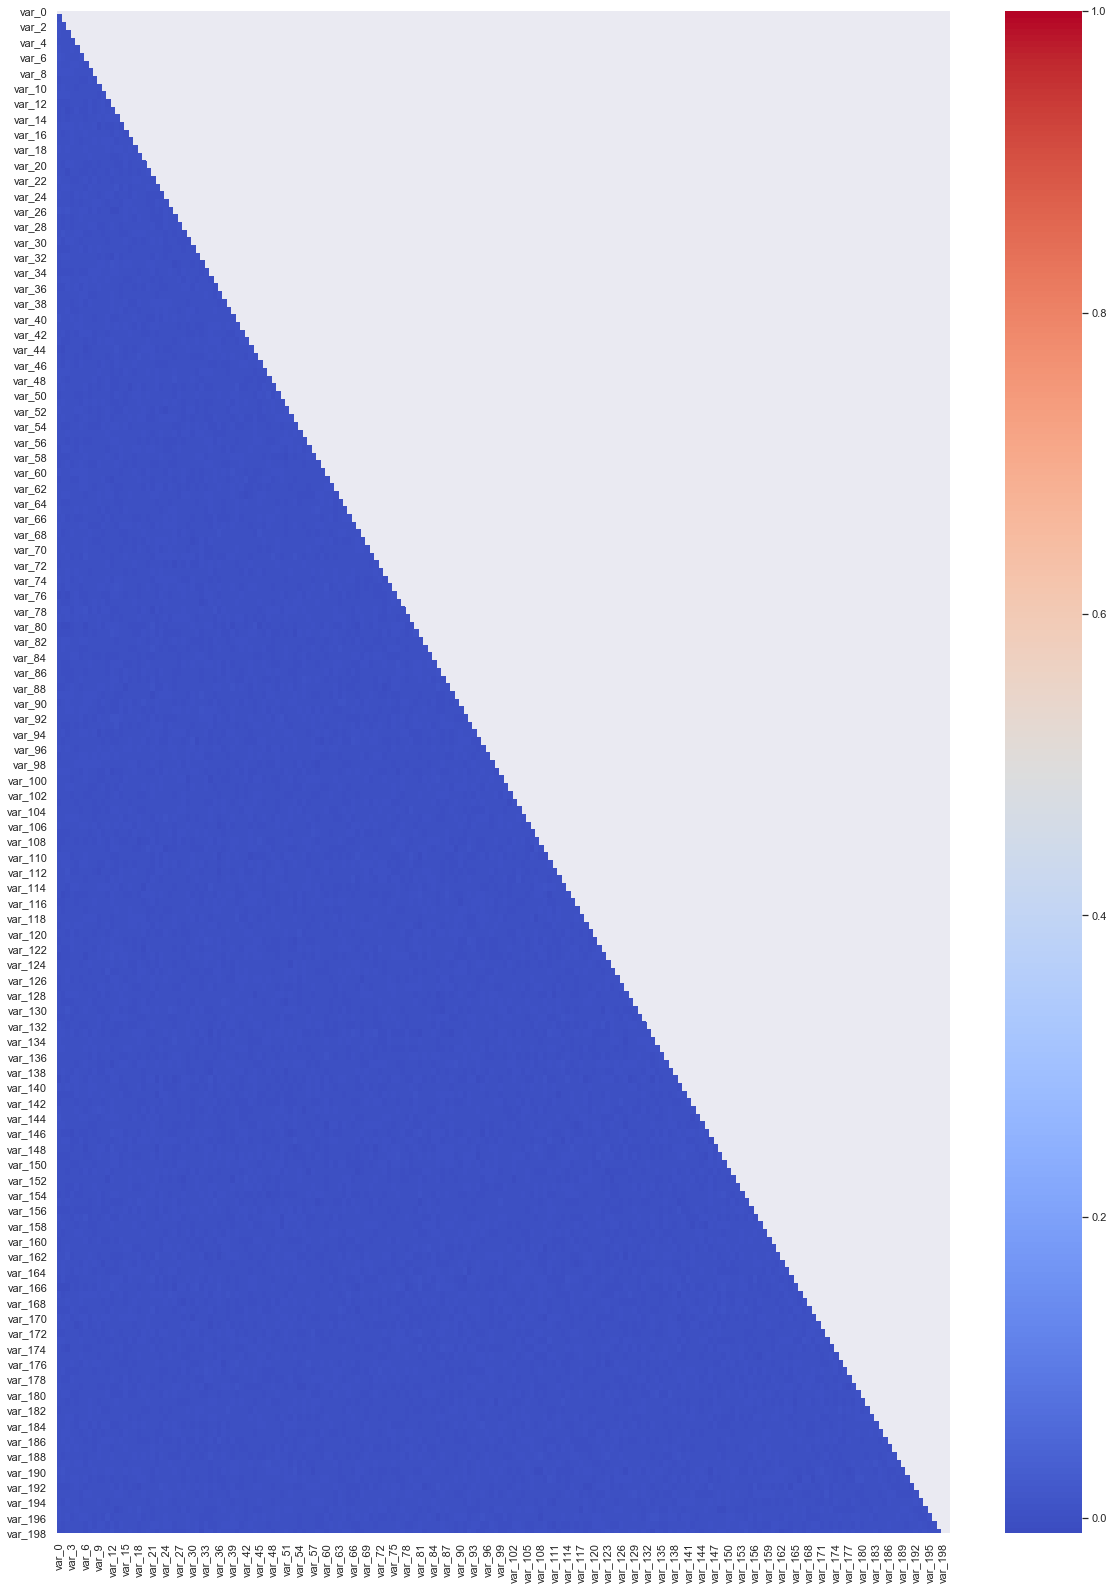

In [14]:
sns.set(rc={'figure.figsize':(20,28)})

# Compute the correlation matrix
correlation = train_data[columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation, mask=mask, 
            #annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

The above figure is the heatmap for the correlation matrix.By observing the figure & the legend,we can conclude that the correletion for a set of any two columns lies between 0-0.4

#### Column wise analysis of target(0 & 1) of all the features using PDF

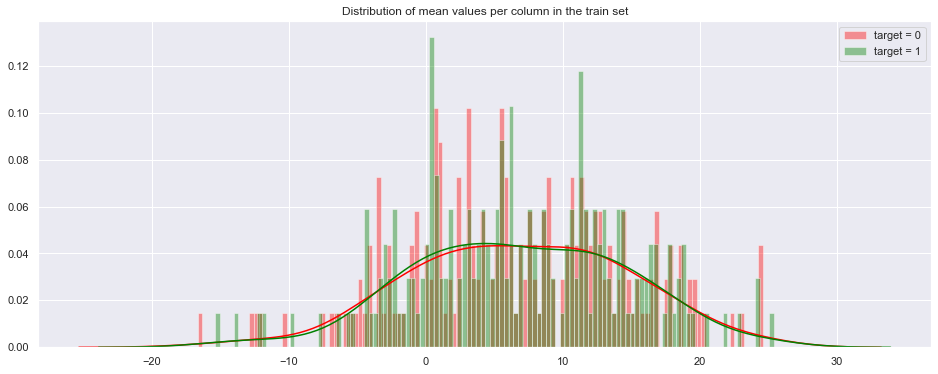

In [15]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(train_data[train_data["target"] == 0][columns].mean(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(train_data[train_data["target"] == 1][columns].mean(axis=0),color="green", kde=True,bins=120, label='target = 1')
plt.legend();
plt.show()

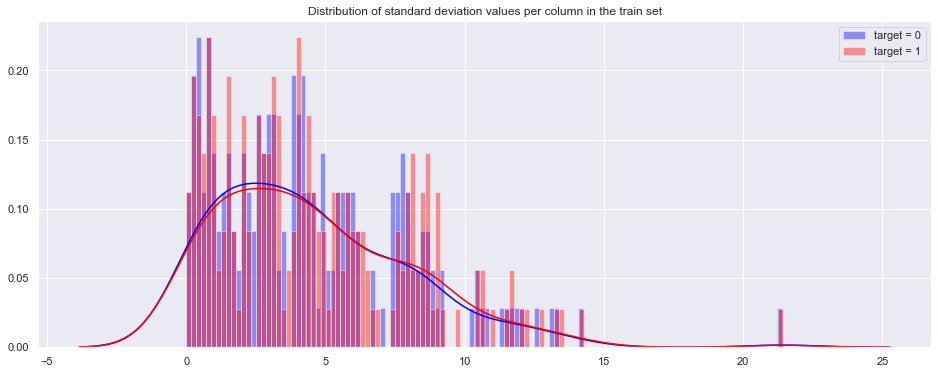

In [16]:
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation values per column in the train set")
sns.distplot(train_data[train_data["target"] == 0][columns].std(axis=0),color="blue", kde=True,bins=120, label='target = 0')
sns.distplot(train_data[train_data["target"] == 1][columns].std(axis=0),color="red", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

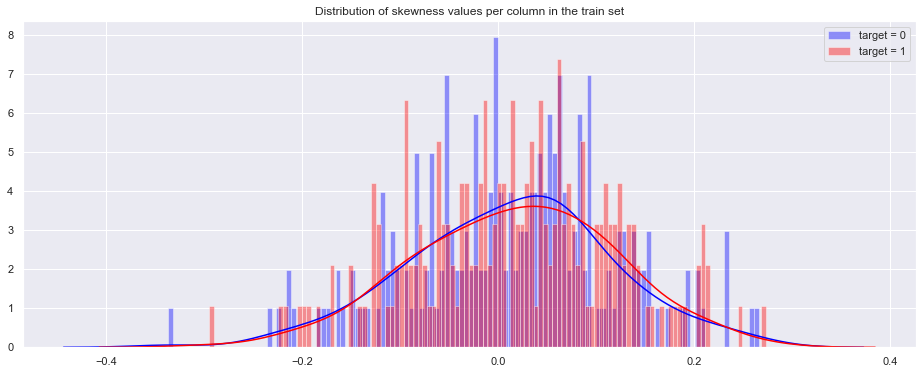

In [17]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skewness values per column in the train set")
sns.distplot(train_data[train_data["target"] == 0][columns].skew(axis=0),color="blue", kde=True,bins=120, label='target = 0')
sns.distplot(train_data[train_data["target"] == 1][columns].skew(axis=0),color="red", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

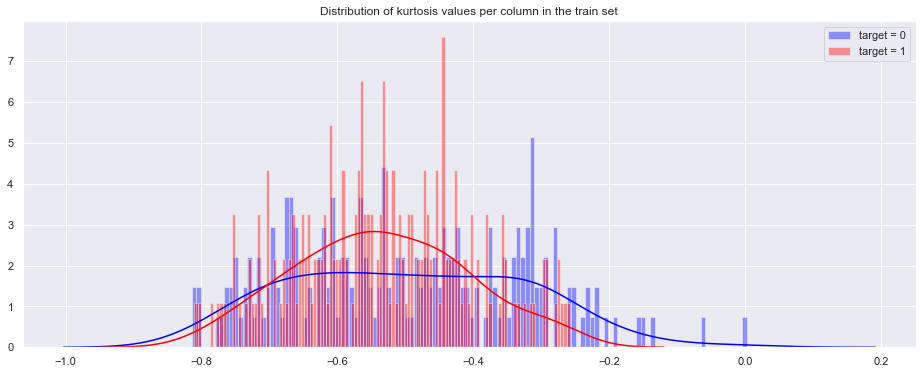

In [18]:
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis values per column in the train set")
sns.distplot(train_data[train_data["target"] == 0][columns].kurtosis(axis=0),color="blue", kde=True,bins=120, label='target = 0')
sns.distplot(train_data[train_data["target"] == 1][columns].kurtosis(axis=0),color="red", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

#### Column wise analysis of all the features using PDF & CDF(no target-wise)

In [8]:
X_train_data = train_data.drop(['ID_code','target'],axis=1)

In [9]:
X_train_data.loc[200000] = X_train_data[columns].mean(axis=0)

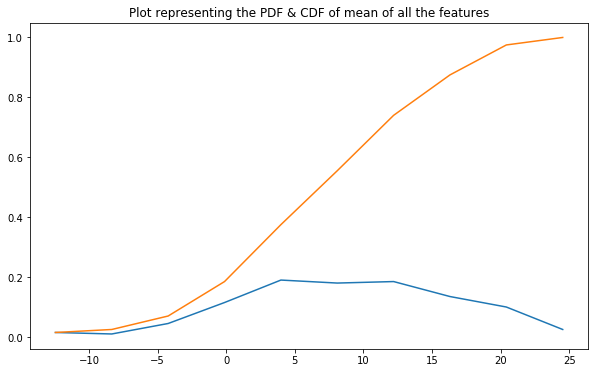

In [10]:
counts, bin_edges = np.histogram(X_train_data.loc[200000], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
fig = plt.figure(figsize = (10,6))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("Plot representing the PDF & CDF of mean of all the features")
plt.show();

96% of the columns have mean upto 20 , 7% of the columns have mean upto -5 & 73% of the columns have mean between -5 to 20.

In [11]:
X_train_data.loc[200001] = X_train_data[columns].median(axis=0)

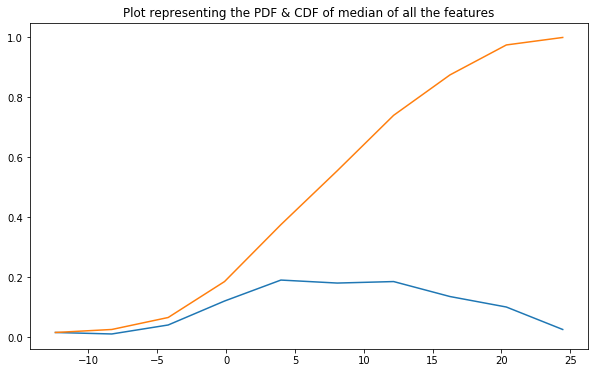

In [12]:
counts, bin_edges = np.histogram(X_train_data.loc[200001], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
fig = plt.figure(figsize = (10,6))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("Plot representing the PDF & CDF of median of all the features")
plt.show();

The same observation is for median also.

In [13]:
X_train_data.loc[200002] = X_train_data[columns].max(axis=0)

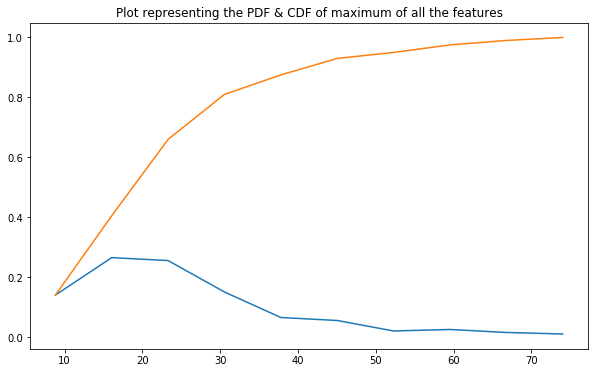

In [14]:
counts, bin_edges = np.histogram(X_train_data.loc[200002], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
fig = plt.figure(figsize = (10,6))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("Plot representing the PDF & CDF of maximum of all the features")
plt.show();

In [15]:
X_train_data.loc[200003] = X_train_data[columns].min(axis=0)

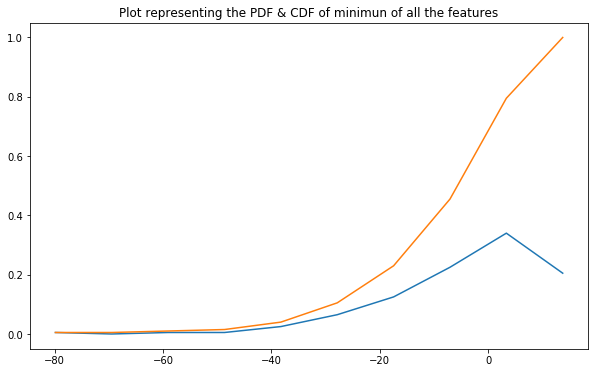

In [16]:
counts, bin_edges = np.histogram(X_train_data.loc[200003], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
fig = plt.figure(figsize = (10,6))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("Plot representing the PDF & CDF of minimun of all the features")
plt.show();

In [17]:
X_train_data.loc[200004] = X_train_data[columns].std(axis=0)

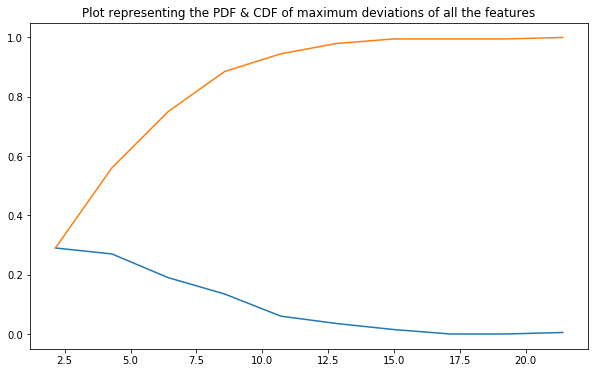

In [18]:
counts, bin_edges = np.histogram(X_train_data.loc[200004], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
fig = plt.figure(figsize = (10,6))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("Plot representing the PDF & CDF of maximum deviations of all the features")
plt.show();

90% of columns have standard deviation upto 40 & remaining 10% have median upto 40-75.

In [19]:
X_train_data.loc[200005] = X_train_data[columns].skew(axis=0)

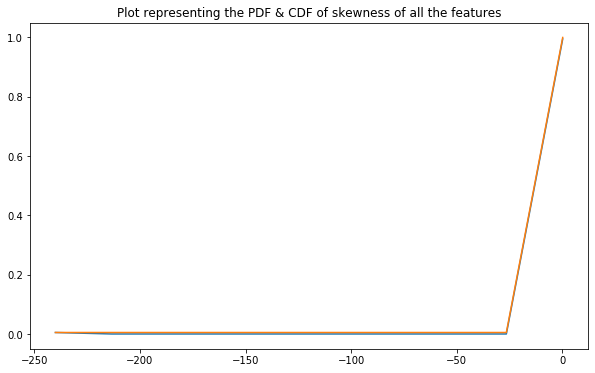

In [20]:
counts, bin_edges = np.histogram(X_train_data.loc[200005], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
fig = plt.figure(figsize = (10,6))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("Plot representing the PDF & CDF of skewness of all the features")
plt.show();

All columns have skewness between -25 to 0.

In [21]:
X_train_data.loc[200006] = X_train_data[columns].kurtosis(axis=0)

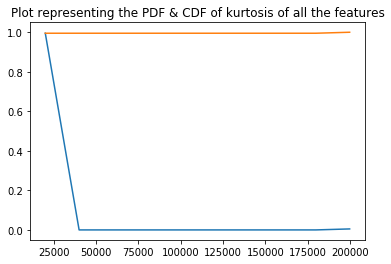

In [22]:
counts, bin_edges = np.histogram(X_train_data.loc[200006], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
fig = plt.figure(figsize = (6,4))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("Plot representing the PDF & CDF of kurtosis of all the features")
plt.show();

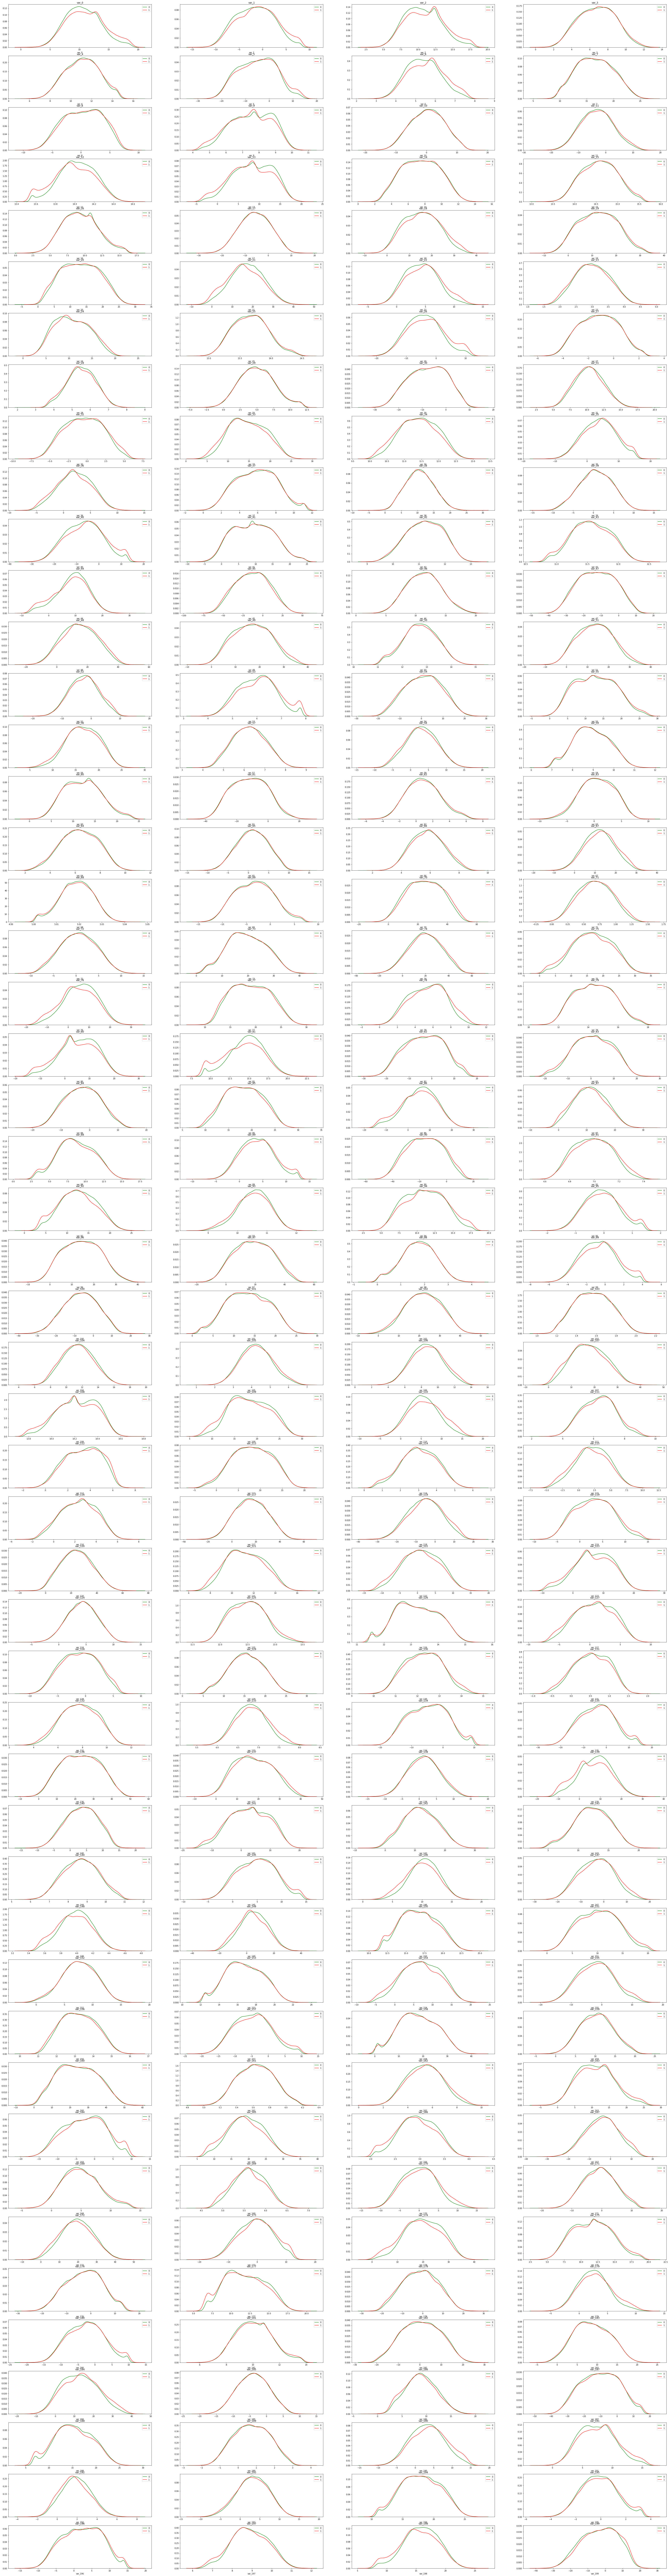

In [23]:
plt.figure(figsize=(60, 240))
for i, col in enumerate(columns):
    plt.subplot(50, 4, i + 1)
    sns.distplot(train_data[train_data["target"] == 0][col], hist=False, label='0', color='g')
    sns.distplot(train_data[train_data["target"] == 1][col], hist=False, label='1', color='r')    
    plt.title(col)

Almost for all the columns Gaussian curves for both positve &negative points are overlapping.

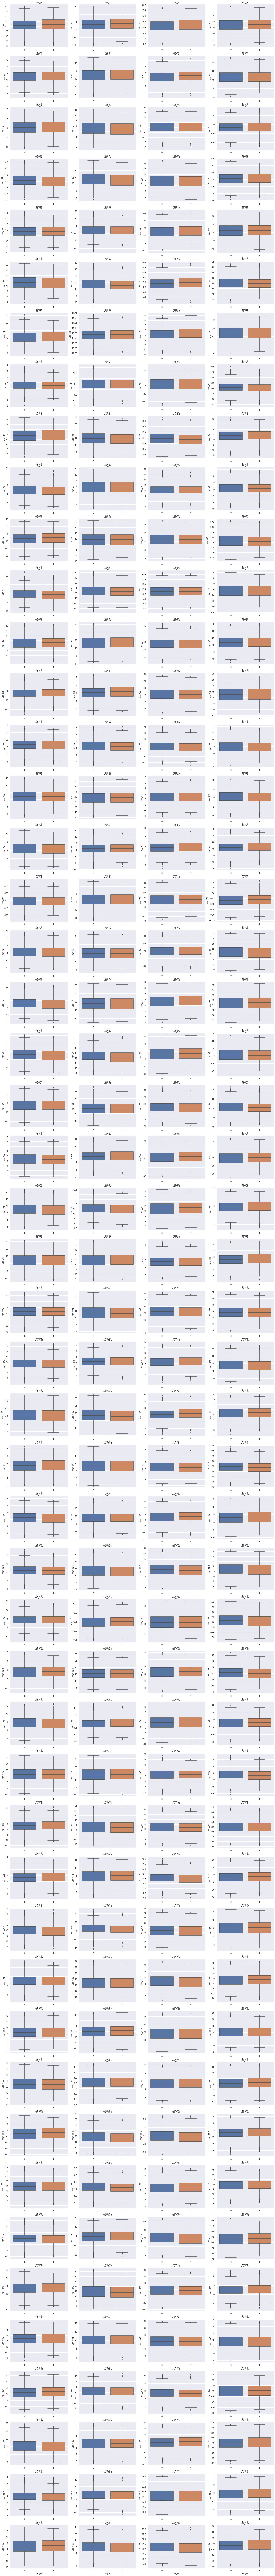

In [35]:
plt.figure(figsize=(24, 240))
for i, col in enumerate(columns):
    plt.subplot(50, 4, i + 1)
    sns.boxplot(x='target',y=col,data=train_data)
    plt.title(col)

Not much conclusions could be drawn from the box plots as for almost all the columns, box looks similar for both 0's & 1's.

In [24]:
X_train_data = X_train_data[0:200000]
Y_train_data = train_data['target']

In [25]:
print('Shape of X train data is :',X_train_data.shape)
print('Shape of Y train data is :',Y_train_data.shape)

Shape of X train data is : (200000, 200)
Shape of Y train data is : (200000,)


## DATA VISUALISATION AND DIMENSIONALITY REDUCTION

### Using Principal Component Analysis(PCA)

In [38]:
# Data-preprocessing: Standardizing the data
standardized_data = StandardScaler().fit_transform(X_train_data)
print(standardized_data.shape)

(200000, 200)


In [39]:
# initializing the pca
pca = decomposition.PCA()

In [40]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (200000, 2)


In [41]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, Y_train_data)).T

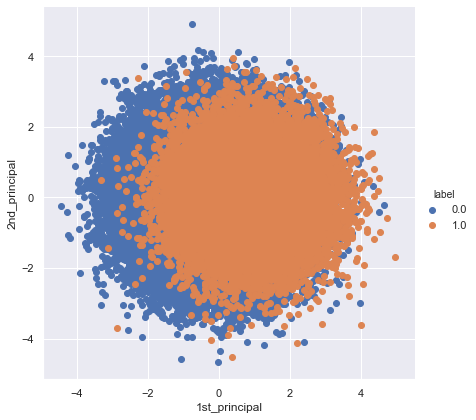

In [42]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

1. Here, we clearly see that both the targets(0's & 1's) are overlapping.
2. Both the classes are not linearly separable.

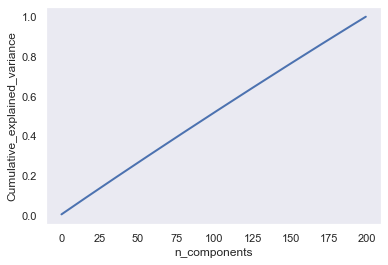

In [43]:
# PCA for dimensionality reduction (non-visualization)

pca.n_components = 200
pca_data = pca.fit_transform(standardized_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 100% of variance is expalined.

1. Here we have used PCA for feature importance.
2. We can clearly see that we are getting a straight line which means there is a linear relationship between no. of components and cumulative explained variance.
3. 100% of the cumulative explained variance is explained by all the 200 dimensions only.
4. That's why we are considering all the 200 dimensions.

### Using T-SNE :




/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


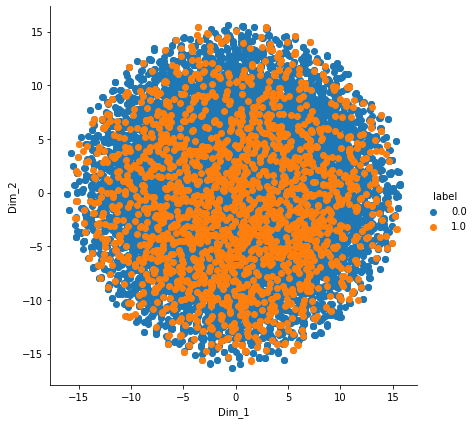

In [0]:
# TSNE

X_train_tsne=X_train_data[0:20000]
Y_train_tsne=Y_train_data[0:20000]

model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(train_tsne)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, Y_train_tsne)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


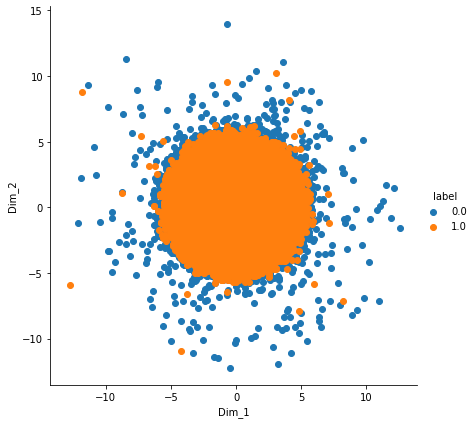

In [0]:
# TSNE

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(X_train_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, Y_train_data)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

1. The first t-sne plot is plotted using 20000 points and second t-sne plot is plotted considering all the 200000 points.
2. From both the plots it could be considered that both the positive and negative points are overlapping and can not be seperable.

## Train-Test Split

In [26]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_train_data,Y_train_data,stratify = Y_train_data,random_state=42, test_size=0.2)

In [27]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

print("="*100)

(160000, 200) (160000,)
(40000, 200) (40000,)


## MODELLING (Without Featurisation) 

### Using Random Forest

In [46]:
%%time
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,random_state=25,return_train_score=True)

rf_random.fit(X_train,Y_train)

Wall time: 3h 8min 16s


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1,

In [47]:
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.8995125 0.8995125 0.8995125 0.8995125 0.8995125]
mean train scores [0.8995125 0.8995125 0.8995125 0.8995125 0.8995125]


In [48]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=51, min_samples_split=125,
                       min_weight_fraction_leaf=0.0, n_estimators=117,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [49]:
print(rf_random.best_params_)

{'max_depth': 14, 'min_samples_leaf': 51, 'min_samples_split': 125, 'n_estimators': 117}


In [28]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [29]:
%%time
rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=51, min_samples_split=125,
                       min_weight_fraction_leaf=0.0, n_estimators=117,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

rf_clf.fit(X_train,Y_train)
rf_y_train_pred = rf_clf.predict(X_train)
rf_y_test_pred = rf_clf.predict(X_test)

print("="*100)
f1_rf_train = f1_score(Y_train,rf_y_train_pred)
f1_rf_test = f1_score(Y_test,rf_y_test_pred)
print('Train f1 score :',f1_rf_train)
print('Test f1 score : ',f1_rf_test)

print("="*100)
roc_rf_train = roc_auc_score(Y_train, rf_clf.predict_proba(X_train)[:,1] )
roc_rf_test = roc_auc_score(Y_test, rf_clf.predict_proba(X_test)[:,1] )
print("AUC score on train data :",roc_rf_train)
print("AUC score on test data :",roc_rf_test)

print("="*100)
log_loss_rf_train = log_loss(Y_train, rf_clf.predict_proba(X_train)[:,1])
log_loss_rf_test = log_loss(Y_test, rf_clf.predict_proba(X_test)[:,1])
print("Log loss on train data :",log_loss_rf_train)
print("Log loss on test data :",log_loss_rf_test)

C:\Users\lenovo-pc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Train f1 score : 0.0
Test f1 score :  0.0
AUC score on train data : 0.8930617088914344
AUC score on test data : 0.8173201391596767
Log loss on train data : 0.2684015258446696
Log loss on test data : 0.2870109645693767
Wall time: 3min 46s


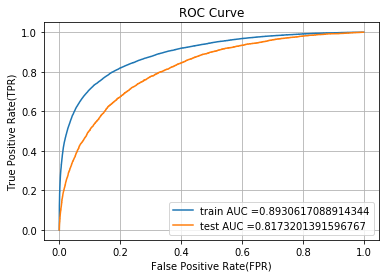

In [37]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
rf_y_train_pred = rf_clf.predict_proba(X_train)[:,1] 
rf_y_test_pred = rf_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, rf_y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, rf_y_test_pred)

plt.figure(1, figsize=(6, 4))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [38]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(rf_y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(rf_y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999918410864 for threshold 0.085
[[71948 71974]
 [  858 15220]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999993743049764 for threshold 0.165
[[34294  1686]
 [ 2590  1430]]


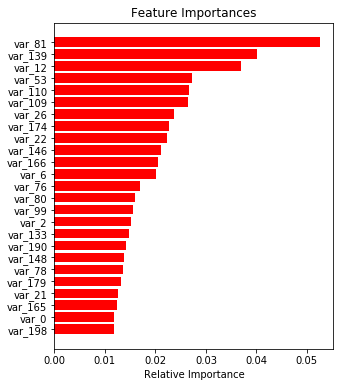

In [39]:
features = columns
importances = rf_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(5,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Using XGBoost

In [58]:
%%time
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = xgb.XGBClassifier(random_state=25,n_jobs=-1)

xgb_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,random_state=25,return_train_score=True)

xgb_random.fit(X_train,Y_train)

KeyboardInterrupt: 

In [59]:
print('mean test scores',xgb_random.cv_results_['mean_test_score'])
print('mean train scores',xgb_random.cv_results_['mean_train_score'])

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

In [113]:
print(xgb_random.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, min_samples_leaf=56, min_samples_split=179,
              missing=None, n_estimators=106, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=25, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)


In [114]:
print(xgb_random.best_params_)

{'max_depth': 11, 'min_samples_leaf': 56, 'min_samples_split': 179, 'n_estimators': 106}


In [40]:
%%time
xgb_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=56, min_samples_split=179,
              missing=None, n_estimators=65, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=25, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

xgb_clf.fit(X_train,Y_train)
xgb_y_train_pred = xgb_clf.predict(X_train)
xgb_y_test_pred = xgb_clf.predict(X_test)

print("="*100)
f1_xg_train = f1_score(Y_train,xgb_y_train_pred)
f1_xg_test = f1_score(Y_test,xgb_y_test_pred)
print('Train f1 score : ',f1_xg_train)
print('Test f1 score : ',f1_xg_test)

print("="*100)
roc_xg_train = roc_auc_score(Y_train, xgb_clf.predict_proba(X_train)[:,1] )
roc_xg_test = roc_auc_score(Y_test, xgb_clf.predict_proba(X_test)[:,1] )
print("AUC score on train data :",roc_xg_train)
print("AUC score on test data :",roc_xg_test)

print("="*100)
log_loss_xg_train = log_loss(Y_train, xgb_clf.predict_proba(X_train)[:,1])
log_loss_xg_test = log_loss(Y_test, xgb_clf.predict_proba(X_test)[:,1])
print("Log loss on train data :",log_loss_xg_train)
print("Log loss on test data :",log_loss_xg_test)

Train f1 score :  0.10248245769208089
Test f1 score :  0.04371053909664886
AUC score on train data : 0.8850490379960911
AUC score on test data : 0.8252246514785715
Log loss on train data : 0.24852338742983993
Log loss on test data : 0.27223580579231493
Wall time: 5min
Parser   : 224 ms


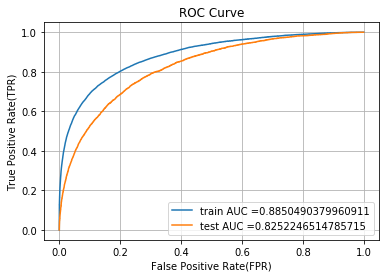

In [41]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
xgb_y_train_pred = xgb_clf.predict_proba(X_train)[:,1] 
xgb_y_test_pred = xgb_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, xgb_y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, xgb_y_test_pred)

plt.figure(1, figsize=(6, 4))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [42]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(xgb_y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(xgb_y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999922755844 for threshold 0.076
[[71965 71957]
 [  924 15154]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999806884252 for threshold 0.185
[[34340  1640]
 [ 2532  1488]]


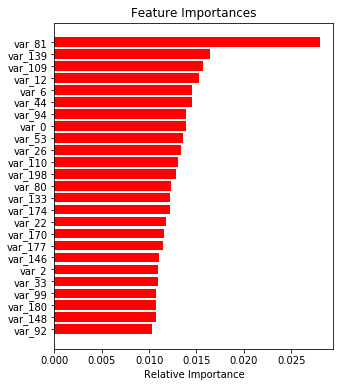

In [43]:
features = columns
importances = xgb_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(5,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Using Light Gradient Boost

In [41]:
%%time
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = lgb.LGBMClassifier(random_state=25,n_jobs=-1)

lgb_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,random_state=25,return_train_score=True)

lgb_random.fit(X_train,Y_train)

Wall time: 44min 7s


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=25, reg_alpha=0.0,
                                            reg_...
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000AB0

In [42]:
print('mean test scores:',lgb_random.cv_results_['mean_test_score'])
print('mean train scores:',lgb_random.cv_results_['mean_train_score'])

mean test scores: [0.90989375 0.9087     0.908625   0.9088     0.91020625]
mean train scores: [0.92204722 0.92035903 0.91960278 0.92004653 0.92299583]


In [43]:
lgb_random_best_estimator = lgb_random.best_estimator_
print(lgb_random_best_estimator)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=14,
               min_child_samples=20, min_child_weight=0.001,
               min_samples_leaf=28, min_samples_split=111, min_split_gain=0.0,
               n_estimators=121, n_jobs=-1, num_leaves=31, objective=None,
               random_state=25, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [44]:
lgb_random_best_params = lgb_random.best_params_
print(lgb_random_best_params)

{'max_depth': 14, 'min_samples_leaf': 28, 'min_samples_split': 111, 'n_estimators': 121}


In [44]:
%%time
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=14,
               min_child_samples=20, min_child_weight=0.001,
               min_samples_leaf=28, min_samples_split=111, min_split_gain=0.0,
               n_estimators=121, n_jobs=-1, num_leaves=31, objective=None,
               random_state=25, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgb_clf.fit(X_train,Y_train)
lgb_y_train_pred = lgb_clf.predict(X_train)
lgb_y_test_pred = lgb_clf.predict(X_test)

print("="*100)
f1_lgb_train=f1_score(Y_train,lgb_y_train_pred)
f1_lgb_test=f1_score(Y_test,lgb_y_test_pred)
print('Train f1 score : ',f1_lgb_train)
print('Test f1 score : ',f1_lgb_test)

print("="*100)
roc_lgb_train = roc_auc_score(Y_train, lgb_clf.predict_proba(X_train)[:,1] )
roc_lgb_test = roc_auc_score(Y_test, lgb_clf.predict_proba(X_test)[:,1] )
print("AUC score on train data :",roc_lgb_train)
print("AUC score on test data :",roc_lgb_test)

print("="*100)
log_loss_lgb_train = log_loss(Y_train, lgb_clf.predict_proba(X_train)[:,1] )
log_loss_lgb_test = log_loss(Y_test, lgb_clf.predict_proba(X_test)[:,1] )
print("Log loss on train data :",log_loss_lgb_train)
print("Log loss on test data :",log_loss_lgb_test)

Train f1 score :  0.37456786412144893
Test f1 score :  0.2165217391304348
AUC score on train data : 0.9340211538129476
AUC score on test data : 0.8708036457512328
Log loss on train data : 0.19755183853628444
Log loss on test data : 0.23540864065639602
Wall time: 58.2 s
Parser   : 127 ms


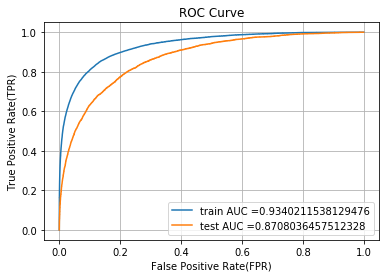

In [45]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
lgb_y_train_pred = lgb_clf.predict_proba(X_train)[:,1] 
lgb_y_test_pred = lgb_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, lgb_y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, lgb_y_test_pred)

plt.figure(1, figsize=(6, 4))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [46]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(lgb_y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(lgb_y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999648056331 for threshold 0.052
[[71988 71934]
 [  358 15720]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999922753702 for threshold 0.247
[[34507  1473]
 [ 2198  1822]]


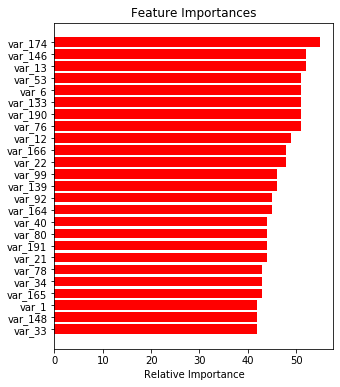

In [47]:
features = columns
importances = lgb_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(5,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Using Stacking the previous model

In [48]:
stacked_y_pred_train = pd.DataFrame([rf_y_train_pred,xgb_y_train_pred,lgb_y_train_pred])
stacked_y_pred_train = stacked_y_pred_train.T
stacked_y_pred_train.columns = ['Random Forest Predictions','XG Boost Predictions','LGBM Predictions']

stacked_y_pred_test = pd.DataFrame([rf_y_test_pred,xgb_y_test_pred,lgb_y_test_pred])
stacked_y_pred_test = stacked_y_pred_test.T
stacked_y_pred_test.columns = ['Random Forest Predictions','XG Boost Predictions','LGBM Predictions']

In [49]:
%%time
stacklgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=14,
               min_child_samples=20, min_child_weight=0.001,
               min_samples_leaf=28, min_samples_split=111, min_split_gain=0.0,
               n_estimators=121, n_jobs=-1, num_leaves=31, objective=None,
               random_state=25, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

stacklgb_clf.fit(stacked_y_pred_train,Y_train)
stacklgb_y_train_pred = stacklgb_clf.predict(stacked_y_pred_train)
stacklgb_y_test_pred = stacklgb_clf.predict(stacked_y_pred_test)

print("="*100)
f1_stacklgb_train=f1_score(Y_train,stacklgb_y_train_pred)
f1_stacklgb_test=f1_score(Y_test,stacklgb_y_test_pred)
print('Train f1 score : ',f1_stacklgb_train)
print('Test f1 score : ',f1_stacklgb_test)

print("="*100)
roc_stacklgb_train = roc_auc_score(Y_train, stacklgb_clf.predict_proba(stacked_y_pred_train)[:,1] )
roc_stacklgb_test = roc_auc_score(Y_test, stacklgb_clf.predict_proba(stacked_y_pred_test)[:,1] )
print("AUC score on train data :",roc_stacklgb_train)
print("AUC score on test data :",roc_stacklgb_test)

print("="*100)
log_loss_stacklgb_train = log_loss(Y_train, stacklgb_clf.predict_proba(stacked_y_pred_train)[:,1] )
log_loss_stacklgb_test = log_loss(Y_test, stacklgb_clf.predict_proba(stacked_y_pred_test)[:,1] )
print("Log loss on train data :",log_loss_stacklgb_train)
print("Log loss on test data :",log_loss_stacklgb_test)

Train f1 score :  0.6701072142467746
Test f1 score :  0.45654548291465125
AUC score on train data : 0.9505265939625328
AUC score on test data : 0.8678659302155151
Log loss on train data : 0.14938957546165804
Log loss on test data : 0.2398591475019066
Wall time: 4.76 s


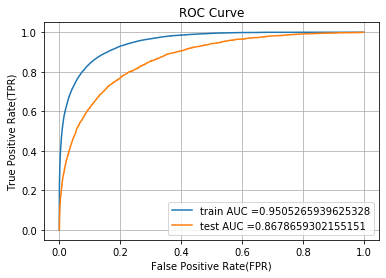

In [55]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
stacklgb_y_train_pred = stacklgb_clf.predict_proba(stacked_y_pred_train)[:,1] 
stacklgb_y_test_pred = stacklgb_clf.predict_proba(stacked_y_pred_testy)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, stacklgb_y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, stacklgb_y_test_pred)

plt.figure(1, figsize=(6, 4))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [56]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(stacklgb_y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(stacklgb_y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999999517224 for threshold 0.012
[[71962 71960]
 [   92 15986]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999304783307 for threshold 0.161
[[32323  3657]
 [ 1522  2498]]


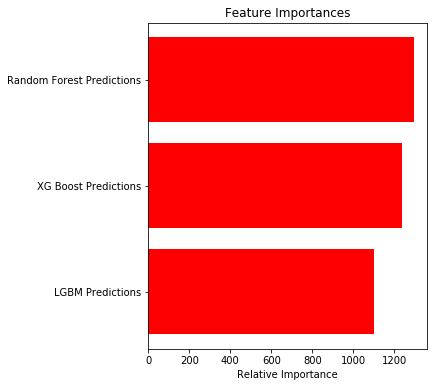

In [58]:
features = stacked_y_pred_train.columns
importances = stacklgb_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(5,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparison of Evaluation Metrics:

In [60]:
#http://zetcode.com/python/prettytable/
x = PrettyTable()
x.field_names = ["Model", "Hyperparameter", "Test f1 Score", "Test AUC","Test log loss"]
x.add_row(["Random Forest", "max_depth:14,min_sample_leaf:51,\nmin_sample_split:125,n_estimator:117",f1_rf_test, roc_rf_test,log_loss_rf_test])
x.add_row(["XGBoost", "max_depth:5,min_sample_leaf:51,\nmin_sample_split:125,nn_estimator:65",f1_xg_test, roc_xg_test,log_loss_xg_test])
x.add_row(["Light GB", "max_depth:14,min_sample_leaf:28,\nmin_sample_split:111,n_estimator:121",f1_lgb_test,roc_lgb_test,log_loss_lgb_test])
x.add_row(["Stacking", "(Random Forest+XGBoost+Light GB+Light GB),\nMeta=Classifier=Light GB",f1_stacklgb_test,roc_stacklgb_test,log_loss_stacklgb_test])

print(x)

+---------------+--------------------------------------------+---------------------+--------------------+---------------------+
|     Model     |               Hyperparameter               |    Test f1 Score    |      Test AUC      |    Test log loss    |
+---------------+--------------------------------------------+---------------------+--------------------+---------------------+
| Random Forest |      max_depth:14,min_sample_leaf:51,      |         0.0         | 0.8173201391596767 |  0.2870109645693767 |
|               |    min_sample_split:125,n_estimator:117    |                     |                    |                     |
|    XGBoost    |      max_depth:5,min_sample_leaf:51,       | 0.04371053909664886 | 0.8252246514785715 | 0.27223580579231493 |
|               |    min_sample_split:125,nn_estimator:65    |                     |                    |                     |
|    Light GB   |      max_depth:14,min_sample_leaf:28,      |  0.2165217391304348 | 0.8708036457512328 

#### OBSERVATIONS :

1. Among all the four models, Light GB model performed best ,either in terms of f1 score or AUC score or test log-loss.
2. So we will consider LGB model for predicting the label on test data(after training  on train data) after doing the feature engineering and will use it for kaggle submission.

## FEATURISATION

### FEATURE 1 (Deriving from basic properties of columns):

In [26]:
idx = X_train_data.columns.values
for df in [test_data, X_train_data]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

### FEATURE 2 (Deriving from rounding the digits of columns):

In [27]:
#Rounding the digits to 1 & 2 decimal places
#https://www.programiz.com/python-programming/methods/built-in/round
for feature in columns:
    X_train_data['r2_'+feature] = np.round(X_train_data[feature], 2)
    test_data['r2_'+feature] = np.round(test_data[feature], 2)
    X_train_data['r1_'+feature] = np.round(X_train_data[feature], 1)
    test_data['r1_'+feature] = np.round(test_data[feature], 1)

In [4]:
features = list(X_train_data.columns)

In [5]:
train_data = X_train_data

## MODELLING (After performing the Feature engineering)

In [3]:
params = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 1,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 8,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [6]:
# https://www.kaggle.com/adrianlievano/light-gbm-with-stratified-kfold
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000) 
# Here we are declarig an empty array of the length of train data and will be used to store the predicted values of validation data
Y_pred = np.zeros(len(train_data))
# Here we are declarig an empty array of the length of test data and will be used to store the predictions of the test data
predictions = np.zeros(len(test_data))
feature_importance_df = pd.DataFrame()

#In this loop we are doing the training and prediction for each folds and we are getting the train and valid data 
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_data.values, Y_train_data.values)):
    print("Fold {}".format(fold_))
    # Getting the train and validation data from the X_train_data
    trn_data = lgb.Dataset(train_data.iloc[trn_idx][features], label=Y_train_data.iloc[trn_idx]) 
    val_data = lgb.Dataset(train_data.iloc[val_idx][features], label=Y_train_data.iloc[val_idx])
    # Here we are training lightgbm model on train and valid dataset
    num_round = 1000000
    clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    # Here we are doing the prediction on the valid data 
    Y_pred[val_idx] = clf.predict(train_data.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df,fold_importance_df], axis=0)
    # And here we are doing the prediction on the test data
    predictions += clf.predict(test_data[features], num_iteration=clf.best_iteration) / folds.n_splits
print("CV score: {:<8.5f}".format(roc_auc_score(Y_train_data, Y_pred)))

Fold 0
Training until validation scores don't improve for 3000 rounds
[1000]	training's auc: 0.870679	valid_1's auc: 0.851589
[2000]	training's auc: 0.89939	valid_1's auc: 0.876848
[3000]	training's auc: 0.912296	valid_1's auc: 0.887293
[4000]	training's auc: 0.919624	valid_1's auc: 0.892299
[5000]	training's auc: 0.924958	valid_1's auc: 0.895636
[6000]	training's auc: 0.929253	valid_1's auc: 0.896759
[7000]	training's auc: 0.933052	valid_1's auc: 0.897989
[8000]	training's auc: 0.936746	valid_1's auc: 0.898477
[9000]	training's auc: 0.940368	valid_1's auc: 0.898578
[10000]	training's auc: 0.943856	valid_1's auc: 0.898603
[11000]	training's auc: 0.947148	valid_1's auc: 0.898721
[12000]	training's auc: 0.950296	valid_1's auc: 0.898263
[13000]	training's auc: 0.953257	valid_1's auc: 0.898486
Early stopping, best iteration is:
[10994]	training's auc: 0.947121	valid_1's auc: 0.898728
Fold 1
Training until validation scores don't improve for 3000 rounds
[1000]	training's auc: 0.871001	valid

CV score: 0.89918 


In [7]:
test_submission = pd.DataFrame({"ID_code":test_id.values})
test_submission["target"] = predictions
test_submission.to_csv("test_submission.csv",index=False)

In [8]:
Pkl_Filename = "Pickle_LGBM_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

## RESULTS :

1. By performing the Light Gradient Boosting on train data along with stratified k-fold cross validation after doing the Feature Engineering, CV Score of 0.89918 was achieved.
2. This model was an improvement over previous Random Forest model , XG Boost model, LGB model & Stacking Model which was performed without feature engineering .  
3. This model was used to predict the target on test data.
4. When this predicted target file was uploaded on kaggle, kaggle gave a score of "0.89988" which was under the top 10% of the rank.

## CONCLUSIONS :

We can still improve the model with a bit of hyperparameter tuning of the LGBM model, performing some more featurisation and also we can try some deep learning model so that it can help us in getting a better score.

## STEP BY STEP PROCEDURE :

1. Firstly I read the business problem and downloaded the dataset from the below link :
   https://www.kaggle.com/c/santander-customer-transaction-prediction/data
2. Then I loaded all the important libraries and modules.
3. Then I performed the Exploratory Data Analysis(EDA) on train data wrote the summary after each analysis.
4. In EDA we showed how many points belongs to each category using the bar plot for the train data and calculated the percentage of each category.
5. Then we checked for any missing values in the train data.
6. Then we made a list of all the features removing the "ID_code" and "target" columns.
7. Then we made a histogram analysis for all the features representing both the categories in red and green colour.A total of 200 histograms are plotted.
8. Then we plotted histograms for mean frequency,standard deviation frequency,skewness frequency and kurtosis frequency where mean ,standard deviation ,skewness and kurtosis of each columns are calculated  and plotted on X-axis.Below each plot , observations are made.
9. Then we plotted  a heat map for correlation graph ,showing the correlation between each column and wrote the summary of heatmap below.
10. Then we did the Column wise analysis of target(0 & 1) of all the features using PDF curve. The analysis consisted of plotting the distribution  of mean, standard deviation, skewness and kurtosis values per column in the train set for both categories using the barplots and PDF curve.
11. Then we did the Column wise analysis of all the features using PDF and CDF curve. The analysis consisted of plotting the distribution  of mean, median, maximum, minimum, standard deviation, skewness and kurtosis values per column in the train set using the CDF and PDF curve.
12. Then we plotted the Guassian curve and Boxplot for each column showing 0 & 1 separately in the plot and made observations below.
13. Then we performed the Principal Component Analysis(PCA) and t-sne for data visualisation and dimensionality reduction.
14. Then we did the train-test split on train data with test_size of 0.2.This split will be used for experimenting to get the best ML method which will be used to predict the target on the test data.
15. Then we did the modelling on the train data using Random Forest, XGBoost, LGB and Stacked model. Here I did hyperparameter tuning, calculated f1 score, AUC score, log-loss plotted ROC-AUC curve,confusion matrix for both X_train and X_test (obtained after split of train_data) for each Random Forest, XGBoost and LGB.Also the plot of feature importance have been plotted.
16. Then we compared the peformance of these three models using the PRETTY TABLE. f1 score, AUC score and log loss on X_test was used as evaluation metric.Among the 4 models Light GB model performed the best either in terms of f1 score, AUC score or log loss.
17. Then we did the featurisation on both the train as well as test data.
18. Then we applied Light GB on featurised train data using stratified k-fold method.
19. Then we  used this model to predict the target on test data.
20. Then we created a dataframe consisting of 'ID_code' and 'target' and saved this into a new .csv file and submitted this test_submission.csv file into kaggle competition.